In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(12,8)})

In [3]:
!pip install imblearn==0.0

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import time
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# dir = '/content/drive/MyDrive/Maestria/SemestreII/CDA Final/'

In [7]:
# datos = pd.read_csv(dir+"procesado_df.csv")
datos = pd.read_csv("procesado_df.csv")

In [8]:
datos.head(1)

,Unnamed: 0,df_index,review_score,price,freight_value,payment_type,payment_installments,payment_value,seller_city,seller_state,...,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,tiempo_aprobacion_horas,tiempo_alistamiento_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
0,0,0,4,185.0,13.63,credit_card,8,397.26,sao joaquim da barra,SP,...,4.5,4.10747,346,6.82,4.0,0.0,0.0,0,0,1


## **Eliminar columnas categóricas**

In [9]:
datos.drop(columns=[
        'Unnamed: 0', 'df_index','payment_type', 'payment_installments', 'payment_value', "product_category_name", "customer_state","customer_city","seller_state","seller_city"
        ], inplace = True)

In [10]:
datos.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,tiempo_aprobacion_horas,tiempo_alistamiento_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
0,4,185.0,13.63,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,...,4.50,4.10747,346,6.82,4.0,0.0,0.0,0,0,1
1,4,185.0,13.63,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,...,4.50,4.10747,346,6.82,4.0,0.0,0.0,0,0,1
2,5,185.0,20.26,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,...,4.50,4.10747,1100,20.26,13.0,0.0,0.0,0,0,1
3,5,185.0,17.05,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,...,4.50,4.10747,519,17.05,19.0,0.0,0.0,0,0,1
4,5,135.0,18.20,47.0,858.0,1.0,1600.0,30.0,30.0,35.0,...,4.25,4.10747,188,9.10,16.0,0.0,0.0,0,0,1


## **Correlacion**

<AxesSubplot:>

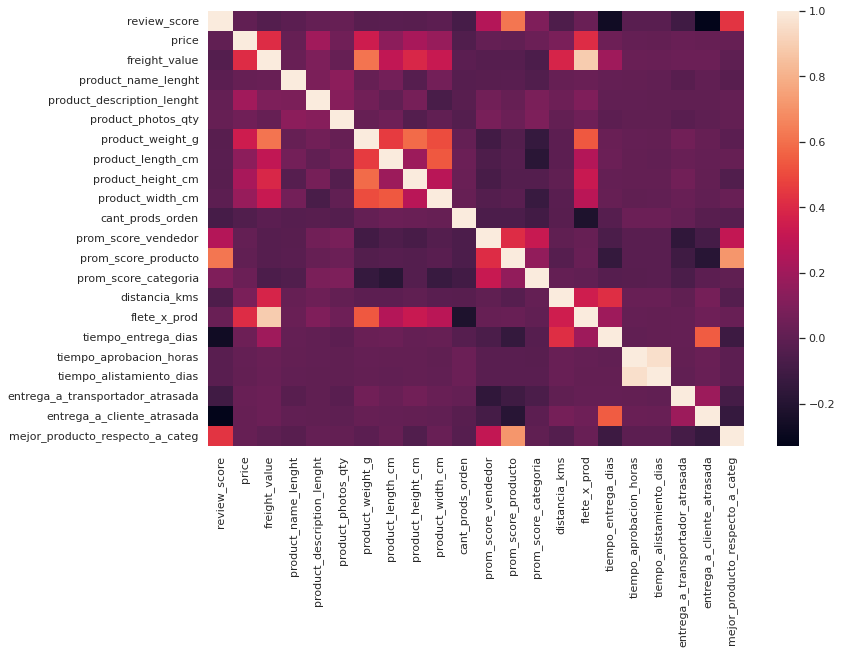

In [11]:
sns.heatmap(datos.corr())

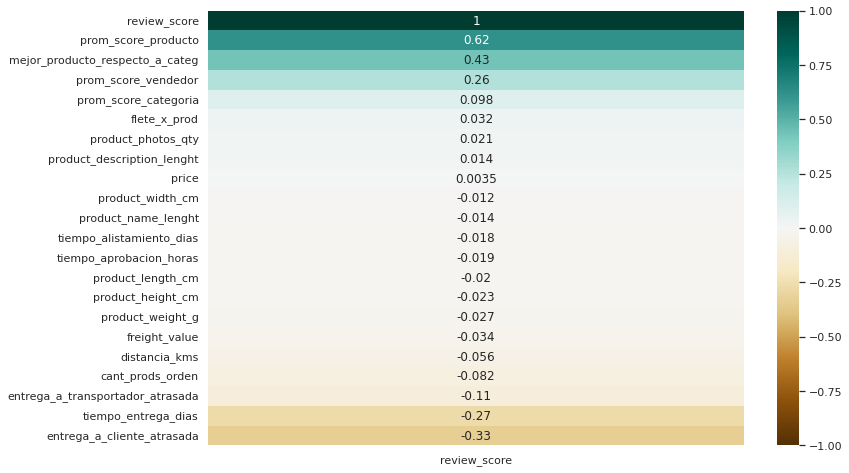

In [12]:
heatmap = sns.heatmap(datos.corr()[['review_score']].sort_values(by='review_score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [13]:
datos.drop(columns=[
        'product_photos_qty',
        "product_length_cm","product_width_cm","product_name_lenght","price","product_weight_g","product_height_cm","tiempo_alistamiento_dias","tiempo_aprobacion_horas",
        "freight_value",
        "product_description_lenght",
        # "cant_prods_orden",
        "freight_value",
        "prom_score_categoria",
        "flete_x_prod",
        'distancia_kms',
        ], inplace = True)

In [14]:
datos.columns

Index(['review_score', 'cant_prods_orden', 'prom_score_vendedor',
       'prom_score_producto', 'tiempo_entrega_dias',
       'entrega_a_transportador_atrasada', 'entrega_a_cliente_atrasada',
       'mejor_producto_respecto_a_categ'],
      dtype='object')

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_resample(datos.drop('review_score', axis=1),  datos['review_score'])

In [19]:
x_train, x_test, y_train, y_test = train_test_split( X_ROS, y_ROS, test_size = 0.3, random_state=42)

In [20]:
rfc4=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc4, param_grid=param_grid, cv= 4)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200]})

In [21]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}

In [22]:
modelo = CV_rfc.best_estimator_

In [ ]:
prediccion_test=modelo.predict(x_test)
print("Accuracy con Random Forest en Test: ",accuracy_score(y_test,prediccion_test))

In [ ]:
# Validar sobreajuste mirando metricas en Train
prediccion_train=modelo.predict(x_train)
print("Accuracy con Random Forest en Train: ",accuracy_score(y_train,prediccion_train))
# Hay un poquito, pero dentro de lo normal

In [ ]:
labels=[1,2,3,4,5]
cf_matrix = confusion_matrix(y_test, prediccion_test, labels)/10

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicciones');ax.set_ylabel('Anotados'); 
ax.set_title('Matriz de confusion'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [ ]:
import pickle
Pkl_Filename = dir+"modelo_entrega2.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(modelo, file)

In [ ]:
# rfc3=RandomForestClassifier(random_state=42, criterion= 'gini', max_features= 'auto', n_estimators=200)
# rfc3.fit(x_train, y_train)

In [ ]:
# pred2=rfc3.predict(x_test)
# print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred2))